<a href="https://colab.research.google.com/github/dan-a-iancu/airm/blob/master/Starbux/S01_AIRM_Starbux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bean to Powder: Sourcing, Processing and Pricing of Cocoa at Starbux
This notebook implements a full solution to the mini-case, walking you through different types of analytics.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Navigation</h3>

**Descriptive and Diagnostic Analytics**  
&nbsp;&nbsp;&nbsp;&nbsp;[Q1. Computing Descriptive Statistics](#Q1)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q2. Building a Histogram and a Scatter Plot](#Q2)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q3. Running a Linear Regression](#Q3)  
**Predictive and Prescriptive Analytics**  
&nbsp;&nbsp;&nbsp;&nbsp;[Q4. A Predictive Model with More Complex Dependencies](#Q4)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q5. Prescriptive Analytics and Optimization](#Q5)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q6. A Simulation Model](#Q6)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q7. Decisions Under Uncertainty](#Q7)  

<a id="1"></a>
## Basic Setup
We start by importing a few useful modules. Click on the run button to run this entire cell.

In [39]:
#@title Import necessary modules
import numpy as np

import urllib.request # for file downloading

# Import pandas for data-frames
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:,.2f}".format

# Make sure Matplotlib runs inline, for nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import matplotlib.ticker as ticker

# import stats models
import statsmodels.api as sm

# Ignore useless some warnings
import warnings
warnings.simplefilter(action="ignore")

# **Part 1. Descriptive and Diagnostic Analytics** 


<a id="Q1"></a>
## Q1. Computing Descriptive Statistics

Let's read the data and have a quick look at it by displaying the first 5 rows.

*If the cells are collapsed, you can expand them by clicking on the arrow to the left.*

In [13]:
#@markdown Read the data from a file and have a quick look at the first 5 rows.

url = "https://raw.githubusercontent.com/dan-a-iancu/airm/master/Starbux/S01_Starbux_market_data.csv"
local_file = "S01_Starbux_market_data.csv"   # name of local file where you want to store the downloaded file
urllib.request.urlretrieve(url, local_file)    # download from website and save it locally

#read data into a dataframe
HistoricalData = pd.read_csv(local_file, index_col=0)

# print first five rows
HistoricalData.head(5)

,Market_Price_Beans,Price_Cocoa_Powder,Sales_Cocoa_Powder
Sample,,,
1,2.20,9.68,266.19
2,3.00,11.15,210.50
3,1.91,9.50,270.98
4,1.45,9.31,279.79
5,1.21,10.27,235.30


Let's now calculate a few descriptive statistics for the open market price such as the mean, minimum and maximum, and also calculate the median separately.

In [14]:
# calculate some descriptive statistics
HistoricalData.describe()

,Market_Price_Beans,Price_Cocoa_Powder,Sales_Cocoa_Powder
count,100.00,100.00,100.00
mean,1.75,10.81,222.21
std,0.63,1.03,37.59
min,0.50,9.28,142.94
25%,1.28,9.89,189.39
50%,1.79,10.62,227.85
75%,2.21,11.69,251.14
max,3.00,12.68,286.57


In [15]:
# calculate the median
HistoricalData.median()

Market_Price_Beans     1.79
Price_Cocoa_Powder    10.62
Sales_Cocoa_Powder   227.85
dtype: float64

<a id="Q2"></a>
## Q2. Building a Histogram and a Scatter Plot
Now let's build a histogram of the open market price, and a scatter plot that shows how the demand for cocoa powder depends on the price.

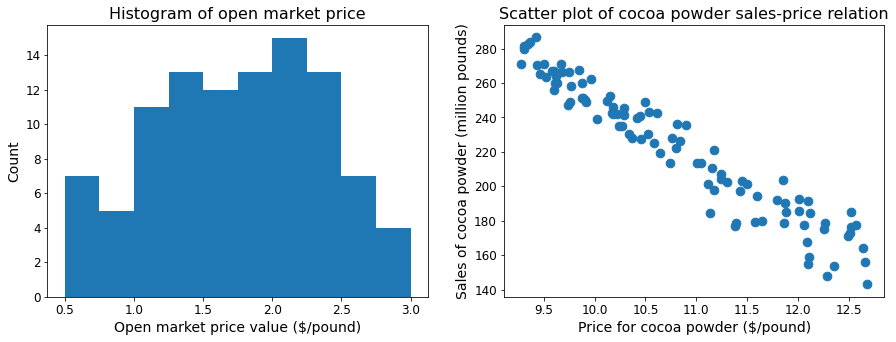

In [41]:
#@markdown Build a **histogram** and a **scatter plot** 
plt.figure(figsize=(15,5)) 

#@markdown Feel free to customize some elements of the **histogram**
#@markdown - choose or type how many bins to use (leave as "Auto" if unsure)
num_bins = "Auto" #@param ["Auto",3,4,5,6,7,10,20,50,100]{allow-input: true}
if num_bins=="Auto":
  num_bins=None
else:
  num_bins=np.int(num_bins)

#@markdown Feel free to customize some elements of the **scatter plot**
#@markdown - choose the marker size in points (leave as "Auto" if unsure)
marker_size = "Auto" #@param ["Auto",100,200,300]{allow-input: true}
if marker_size=="Auto":
  marker_size=300
else:
  marker_size=np.int(marker_size)

#@markdown - choose the marker visibility (0-1, leave as "Auto" if unsure)
marker_visibility = "1" #@param ["Auto",0.3,0.5,0.8, 1.0]{allow-input: true}
if marker_visibility=="Auto":
  marker_visibility=0.5
else:
  marker_visibility=min(1.0, max(0, np.float(marker_visibility)))

plt.subplot(1,2,1)
# the histogram
plt.hist(HistoricalData["Market_Price_Beans"], \
         bins=num_bins, density=False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Count")
plt.xlabel("Open market price value ($/pound)")
plt.title( "Histogram of open market price",fontsize=16)

plt.subplot(1,2,2) 
# the scatter plot
plt.scatter(x=HistoricalData["Price_Cocoa_Powder"], \
            y=HistoricalData["Sales_Cocoa_Powder"],\
            marker='.', s=marker_size, \
            alpha=marker_visibility)   # scatter plot
plt.title( "Scatter plot of cocoa powder sales-price relation", fontsize=16)
plt.xlabel("Price for cocoa powder ($/pound)", fontsize=14)
plt.ylabel("Sales of cocoa powder (million pounds)", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

We can also calculate and print the correlation coefficient for sales and price.

In [ ]:
#@markdown Calculate and print the correlation 
print("Correlation coefficient price-sales: {:.3f}".
     format(HistoricalData["Price_Cocoa_Powder"].corr(HistoricalData["Sales_Cocoa_Powder"])))

Correlation coefficient price-sales: -0.964


<a id="Q3"></a>
##  Q3. Running a Linear Regression

Let's calibrate a **linear model** to our price and sales data, and plot the results of the fit.

*Expand the section for details.*

Coefficients from the fit:
Intercept: 603.907
Slope: -35.315
R-squared: 0.928


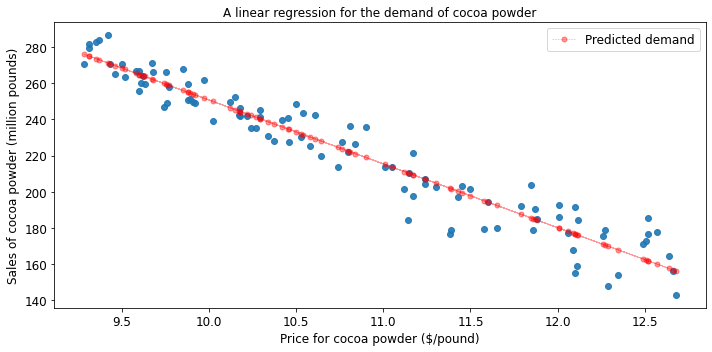

In [40]:
#@markdown Do an Ordinary Least Squares (OLS) regression and display the results
y_data = HistoricalData["Sales_Cocoa_Powder"]
x_data = sm.add_constant(HistoricalData["Price_Cocoa_Powder"])  # add a constant term
model = sm.OLS(y_data, x_data).fit()

print("Coefficients from the fit:")
print("Intercept: {:.3f}".format(model.params[0]))
print("Slope: {:.3f}".format(model.params[1]))
print("R-squared: {:.3f}".format(model.rsquared))

# calculate fitted values
y_predicted = model.predict(x_data)

# plot the fit
plt.figure(figsize=(10,5)) 
plt.scatter(x = HistoricalData["Price_Cocoa_Powder"],  y = HistoricalData["Sales_Cocoa_Powder"],\
            marker = 'o', alpha = 0.9)   # scatter plot
plt.plot(HistoricalData["Price_Cocoa_Powder"],  y_predicted, color='red', linestyle='dashed', \
         linewidth=0.5, marker = '.', markersize = 10, alpha = 0.4 )

plt.title( "A linear regression for the demand of cocoa powder")
plt.xlabel("Price for cocoa powder ($/pound)", fontsize=12)
plt.ylabel("Sales of cocoa powder (million pounds)", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend(['Predicted demand'], fontsize = 12)

plt.tight_layout()

plt.show()

# **Part 2. Predictive and Prescriptive Analytics**

<a id="Q4"></a>
## Q4. A Predictive Model with More Complex Dependencies

We will construct a model to predict Starbux's gross profit. 

*Expand the section for details.*

Let's create a python function that returns the gross profits and price for a given set of parameters.

In [42]:
#@markdown Define a function to calculate gross profit given all problem parameters
def calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                           RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                           DemandIntercept, DemandSlope, Price_Powder):

  # demand and sales
  Demand_Powder = max(0, DemandIntercept + DemandSlope * Price_Powder)
  Sales_Powder = Demand_Powder

  # sourcing quantities
  Beans_Contract = Sales_Powder*ContractPercent
  Beans_OpenMarket = Sales_Powder - Beans_Contract*Yield
  Beans_Total = Beans_Contract + Beans_OpenMarket

  # roasting and processing
  AmountRoasted_Total = Beans_Total
  AmountRoasted_InHouse = min(AmountRoasted_Total, RoastingCapacity)
  AmountRoasted_Outsourced = AmountRoasted_Total - AmountRoasted_InHouse

  # revenues
  Revenues = Sales_Powder * Price_Powder

  # costs
  Cost_SourcingContract = Beans_Contract * ContractPrice
  Cost_OpenMarket = Beans_OpenMarket * OpenMarketPrice
  Cost_Roasting_InHouse = AmountRoasted_InHouse * RoastingCostInHouse 
  Cost_Roasting_Outsourced = AmountRoasted_Outsourced * RoastingCostOutsourced
  Cost_Fixed = FixedCosts if (AmountRoasted_Outsourced > 0) else 0
  Cost_Total = Cost_SourcingContract + Cost_OpenMarket + Cost_Roasting_InHouse + Cost_Roasting_Outsourced + Cost_Fixed

  # gross profit   
  return Revenues - Cost_Total

Now let's calculate the profit for our given data in Question 4.

In [43]:
#@markdown Calculate and display the gross profit
# contract
ContractPercent = 0.60
ContractPrice = 1.50

# open market
OpenMarketPrice = 1.75

# processing
Yield = 0.85
RoastingCapacity = 200000000
RoastingCostInHouse = 4.30
FixedCosts = 100000000
RoastingCostOutsourced = 5.30

# market for roasted beans
DemandIntercept = 600000000
DemandSlope = -35000000
Price_Powder = 11.00

# calculate the gross profit
profit_Q4 = calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                                   RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                                   DemandIntercept, DemandSlope, Price_Powder)

print("Starbux's gross profit prediction: ${:,.0f}.".format(profit_Q4))

Starbux's gross profit prediction: $845,082,500.


<a id="Q5"></a>
## Q5. Prescriptive Analytics and Optimization
Here, we want to know how the price charged for cocoa powder impacts the gross profit, and to determine the **optimal price** to charge to maximize the profit.

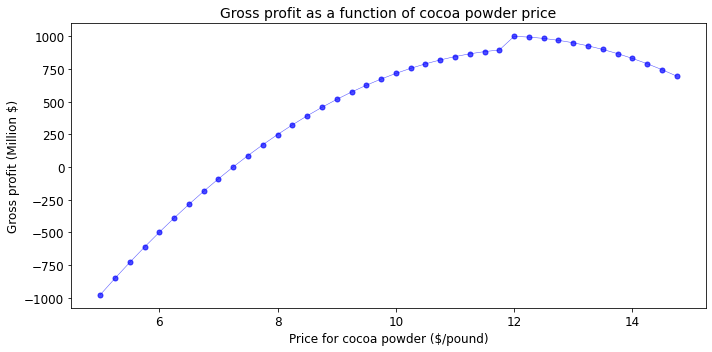

The optimal price to charge is $12.0, resulting in an optimal profit of $999,990,000.


In [49]:
#@markdown Test multiple price points and display the corresponding profits

# run a simple for loop to test multiple values of the price

#@markdown - feel free to change the price values tested (min, max and increment) 
min_price = 5 #@param [5.0, 10.0]
max_price = "15" #@param [10.0, 15.0, 20.0]
price_increment = 0.25 #@param [0.01, 0.05, 0.1, 0.25, 0.5]

min_price = np.float(min_price)
max_price = np.float(max_price)
price_increment = np.float(price_increment)

# generate the test values for the prices
price_test_vals = list(np.arange(min_price,\
                                 max_price,\
                                 price_increment))

# we will calculate the gross profit for every price, so we will store this in a numpy array
SB_profit_vals = np.zeros(len(price_test_vals))

for j in range(len(price_test_vals)):
     SB_profit_vals[j] = calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                                                RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                                                DemandIntercept, DemandSlope, Price_Powder = price_test_vals[j])

# plot the dependency
plt.figure(figsize=(10,5)) 
plt.plot(price_test_vals,  SB_profit_vals/1e6, color='blue', linestyle='solid', \
         linewidth=0.5, marker = '.', markersize = 10, alpha = 0.7 )

plt.title( "Gross profit as a function of cocoa powder price", fontsize=14)
plt.xlabel("Price for cocoa powder ($/pound)", fontsize=12)
plt.ylabel("Gross profit (Million $)", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
#ax = plt.gca()
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
plt.show()

# calculate the optimal price and profit
opt_profit = np.max(SB_profit_vals)
opt_price = price_test_vals[np.argmax(SB_profit_vals)]

print("The optimal price to charge is ${}, resulting in an optimal profit of ${:,.0f}.".\
     format(opt_price,opt_profit))

<a id="Q6"></a>
## Q6. A Simulation Model
Here, we will use scenarios based on historical data to predict potential profit values.

In [53]:
#@markdown Read the scenario data and display a few scenarios 
url_Q6 = "https://raw.githubusercontent.com/dan-a-iancu/airm/master/Starbux/S01_Starbux_scenarios.csv"
local_file_Q6 = "S01_Starbux_scenarios.csv"   # name of local file where you want to store the downloaded file
urllib.request.urlretrieve(url_Q6, local_file_Q6)    # download from website and save it locally

#read data into a dataframe
ScenarioInformation = pd.read_csv(local_file_Q6, index_col=0)
scenarios = list(ScenarioInformation.index)

ScenarioInformation

,Probability,Market_price_beans,Yield,Unnamed: 4
Scenario #,,,,
1.00,3.0%,0.50,85%,nan
2.00,4.0%,0.75,85%,nan
3.00,5.0%,1.00,85%,nan
4.00,12.0%,1.25,85%,nan
5.00,12.0%,1.50,85%,nan
...,...,...,...,...
nan,NaN,nan,NaN,nan
nan,NaN,nan,NaN,nan
nan,NaN,nan,NaN,nan


In [ ]:
# calculate the gross profits for every scenario
SB_profit_vals = np.zeros(len(scenarios))

print("Scenario: \tProfit value:")
for s in range(len(scenarios)):
    SB_profit_vals[s] = calculate_gross_profit(ContractPercent, ContractPrice, \
                                               OpenMarketPrice = ScenarioInformation["Market_price_beans"][s], \
                                               Yield = ScenarioInformation["Yield"][s], \
                                               RoastingCapacity = RoastingCapacity,\
                                               RoastingCostInHouse = RoastingCostInHouse, \
                                               FixedCosts = FixedCosts, RoastingCostOutsourced = RoastingCostOutsourced, \
                                               DemandIntercept = DemandIntercept, DemandSlope = DemandSlope, \
                                               Price_Powder = Price_Powder)
    print("{}\t\t{:,.0f}".format(ScenarioInformation["Scenario #"][s], SB_profit_vals[s]))

# calculate average
print("The expected (weighted average) profit is: {:,.0f}.".\
      format(sum(SB_profit_vals[s] * ScenarioInformation["Probability"][s] for s in range(len(scenarios)))))

Scenario: 	Profit value:
1		976,770,000
2		950,432,500
3		924,095,000
4		897,757,500
5		871,420,000
6		845,082,500
7		865,830,000
8		841,105,000
9		816,380,000
10		791,655,000
11		766,930,000
The expected (weighted average) profit is: 858,469,475.


<a id="Q7"></a>
## Q7. Decisions Under Uncertainty
Next, we study the dependency of the gross profit on the volume of beans purchased in the contract, and on the open market price.

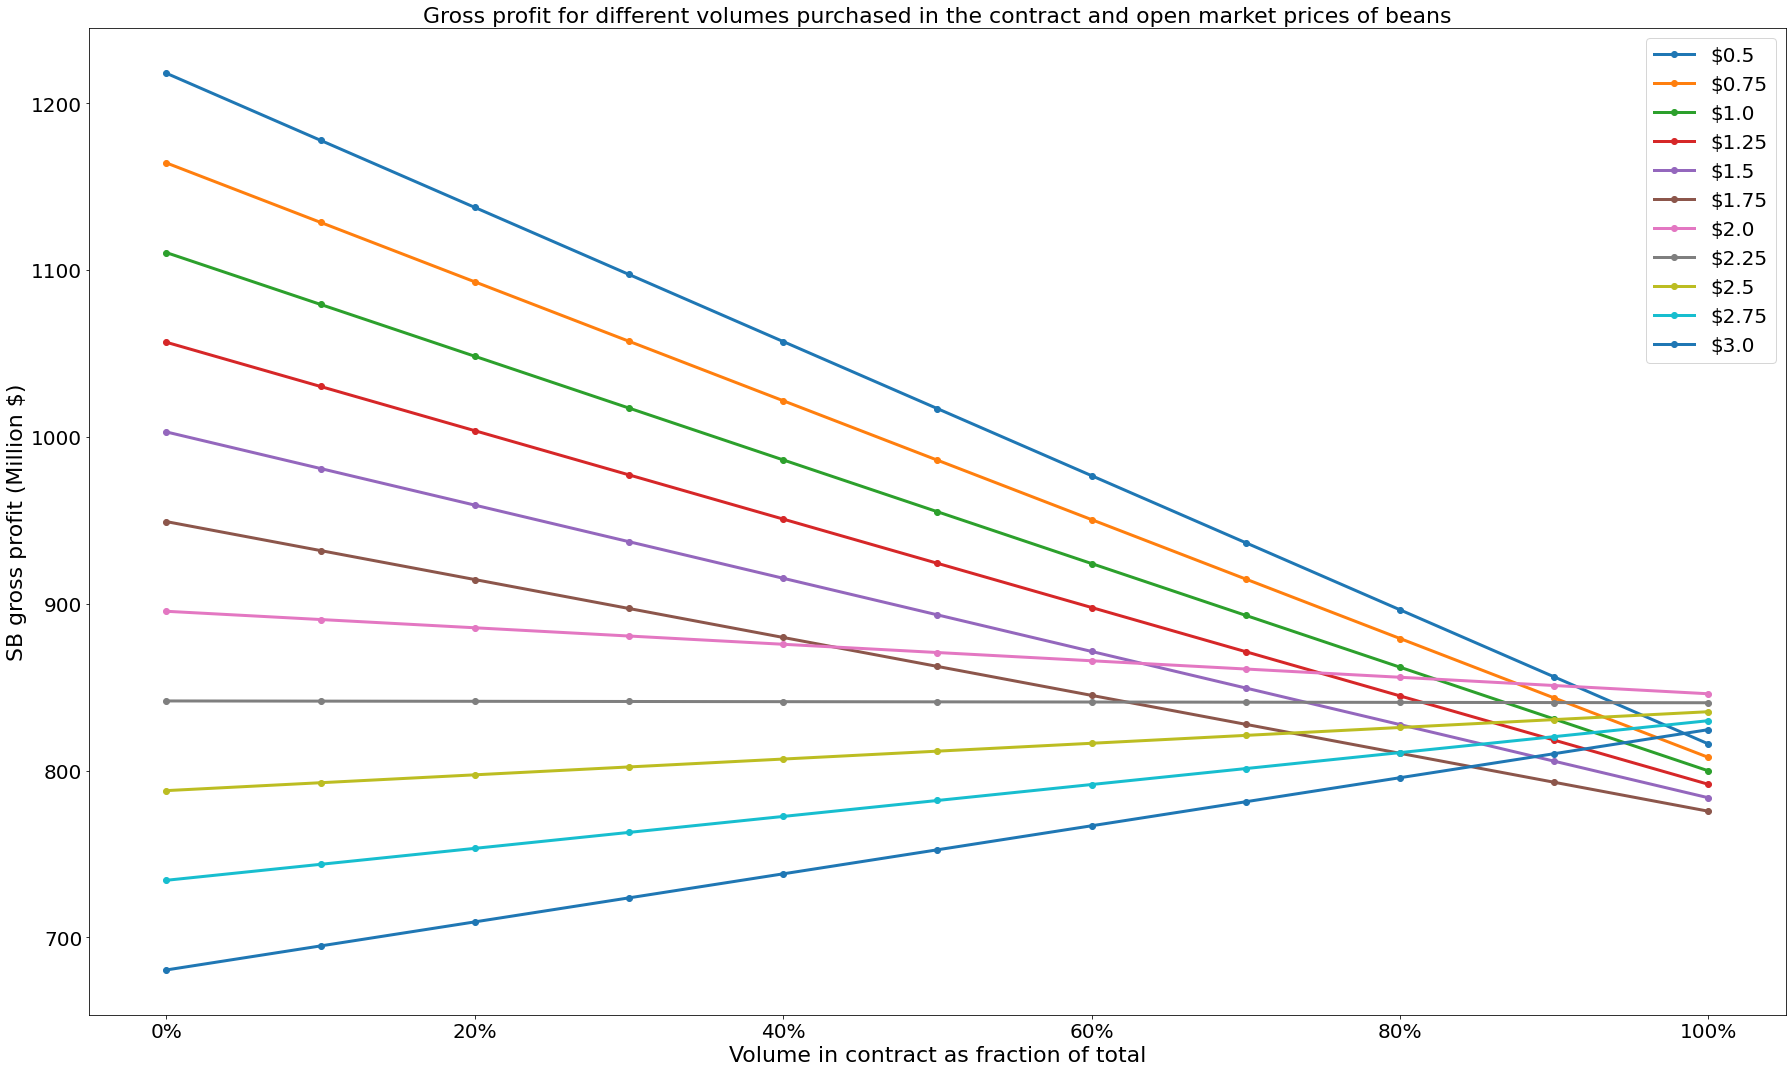

In [ ]:
# read the same data again (just in case)
ScenarioInformation = pd.read_excel("../S01_AIRM_Starbux - template.xlsx", sheet_name = "Q6-scenarios")
scenarios = list(ScenarioInformation.index)

# use 'arange' function from numpy to generate the test values for the percent in the contract
percent_increment = 0.1 # increments of 10% (0.1) for the percentage in contract
percentage_test_vals = np.arange(0,1 + percent_increment, percent_increment)

# calculate the gross profits and revenues for every price
SB_profit_vals = np.zeros((len(percentage_test_vals),len(scenarios)))

for i in range(len(percentage_test_vals)):
    for s in range(len(scenarios)):
        SB_profit_vals[(i,s)] = calculate_gross_profit(ContractPercent = percentage_test_vals[i], \
                                                       ContractPrice = ContractPrice, \
                                                       OpenMarketPrice = ScenarioInformation["Market_price_beans"][s], \
                                                       Yield = ScenarioInformation["Yield"][s], \
                                                       RoastingCapacity = RoastingCapacity,\
                                                       RoastingCostInHouse = RoastingCostInHouse, \
                                                       FixedCosts = FixedCosts, \
                                                       RoastingCostOutsourced = RoastingCostOutsourced, \
                                                       DemandIntercept = DemandIntercept, DemandSlope = DemandSlope, \
                                                       Price_Powder = Price_Powder)

# a single plot for everything
fig, ax1 = plt.subplots(figsize=(25,15))

# do one plot for every value of the open market price
for s in range(len(scenarios)):
    plt.plot(percentage_test_vals*100, SB_profit_vals[:,s]/1e6, linestyle='-', linewidth=3, marker = 'o' )

plt.xlabel("Volume in contract as fraction of total", fontsize=22)
plt.ylabel("SB gross profit (Million $)", fontsize=22)
plt.title("Gross profit for different volumes purchased in the contract and open market prices of beans", \
          fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter())

legend_labels = [ "$" + str(ScenarioInformation["Market_price_beans"][s]) for s in range(len(scenarios)) ]
plt.legend(legend_labels, fontsize=20)
plt.tight_layout()

# uncomment next line to calculate expected profits
# np.dot(SB_profit_vals,ScenarioInformation["Probability"][:])